In [1]:
# import boto3
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
germany_df = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';')
customers_df = pd.read_csv('data/Udacity_CUSTOMERS_052018.csv', sep=';')
train_df = pd.read_csv('data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
#test_df = pd.read_csv('data/Udacity_MAILOUT_052018_TEST.csv', sep=';')
metadata = pd.read_csv('data/metadata.csv')

/Users/richard.wuebker/.pyenv/versions/science/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# unsupervised data exploration

In [3]:
germany_df.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [4]:
germany_df.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,798073.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,8.287263,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,15.628087,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,1.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,9.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,595.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


In [5]:
metadata.head()

,feature_name,type,unknown_neg_one,unknown_zero,unknown_nine,zero_none,needs_reverse,keep
0,AGER_TYP,ordinal,1,1,0,0,0,1
1,ALTERSKATEGORIE_GROB,ordinal,1,1,1,0,0,1
2,ALTER_HH,ordinal,0,1,0,0,0,1
3,ANREDE_KZ,categorical,1,1,0,0,0,1
4,ANZ_HAUSHALTE_AKTIV,ordinal,0,0,0,0,0,1


In [4]:
def reverse_order(val, mx, mn):
    diff_from_low = val - mn
    return mx - diff_from_low


def clean_data_part_one(df, metadata, drop_threshold=20):
    # keep features that exist in the metadata file
    keep_features = list(metadata[metadata['keep'] == 1]['feature_name'])

    df = df[keep_features]
    
    # drop special cases
    df = df[df['CAMEO_DEUG_2015'] != 'X']
    df = df[df['CAMEO_DEU_2015'] != 'XX']
    
    # set zero to negative one where zero means unknown
    unknown_zero_features = list(metadata[metadata['unknown_zero'] == 1]['feature_name'])
    for feature in unknown_zero_features:
        df.loc[df[feature] == 0, feature] = -1
        
    # set nine to negative one where nine means unknown
    unknown_nine_features = list(metadata[metadata['unknown_nine'] == 1]['feature_name'])
    for feature in unknown_nine_features:
        df.loc[df[feature] == 9, feature] = -1
        
    # set -1 (unknown) to np.nan
    df = df.replace(-1, np.nan)
    
    # one hot encode categorical variables
    one_hot_cols = list(metadata.loc[(metadata['type'] == 'categorical') & (metadata['keep'] == 1), 'feature_name'])            
    df = pd.get_dummies(df, prefix=one_hot_cols, columns=one_hot_cols)
    
    return df

In [5]:
print(customers_df.shape)
clean_c_data = clean_data_part_one(customers_df, metadata, drop_threshold=30)
print(clean_c_data.shape)

(191652, 369)
(191526, 375)


In [6]:
print(germany_df.shape)
clean_g_data = clean_data_part_one(germany_df, metadata)
print(clean_g_data.shape)

(891221, 366)
(890848, 377)


In [7]:
print(train_df.shape)
clean_train_data = clean_data_part_one(train_df, metadata)
print(clean_train_data.shape)

(42962, 367)
(42951, 375)


Text(0.5, 1.0, 'Percentage of missing values per each feature (Germany Data)')

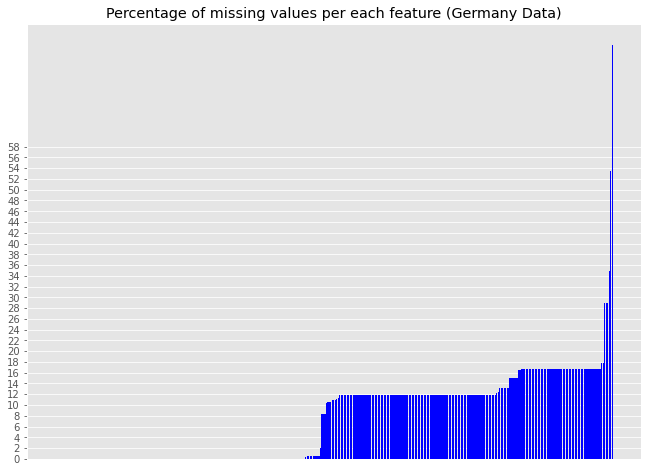

In [8]:
percent_missing = clean_g_data.isnull().sum() * 100 / len(clean_g_data)
missing_value_df = pd.DataFrame({'column_name': clean_g_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

f, ax = plt.subplots(figsize=(11,8))
plt.bar(missing_value_df['column_name'], missing_value_df['percent_missing'], label={}, color='blue')
plt.xticks([])
plt.yticks(range(0,60,2))
plt.title('Percentage of missing values per each feature (Germany Data)')

Text(0.5, 1.0, 'Percentage of missing values per each feature (Germany Data)')

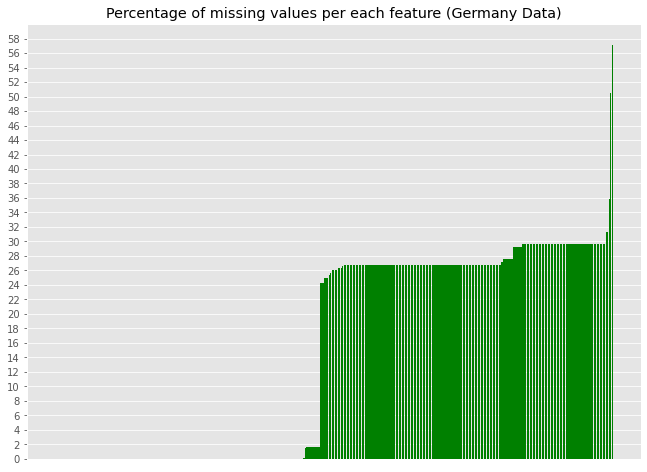

In [9]:
percent_missing = clean_c_data.isnull().sum() * 100 / len(clean_c_data)
missing_value_df = pd.DataFrame({'column_name': clean_c_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

f, ax = plt.subplots(figsize=(11,8))
plt.bar(missing_value_df['column_name'], missing_value_df['percent_missing'], label={}, color='green')
plt.xticks([])
plt.yticks(range(0,60,2))
plt.title('Percentage of missing values per each feature (Germany Data)')

Text(0.5, 1.0, 'Percentage of missing values per each feature (Germany Data)')

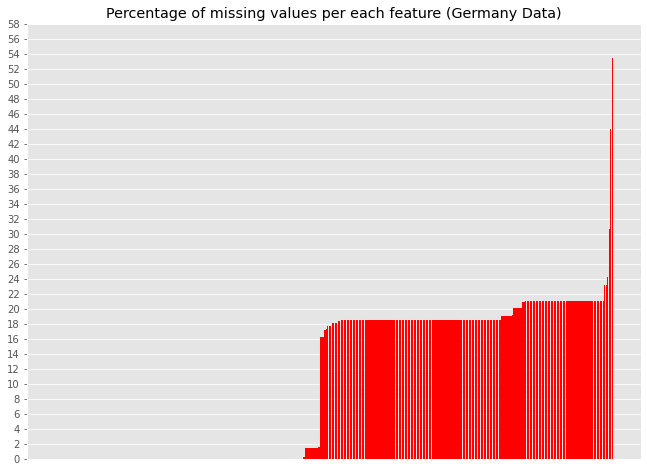

In [10]:
percent_missing = clean_train_data.isnull().sum() * 100 / len(clean_train_data)
missing_value_df = pd.DataFrame({'column_name': clean_train_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

f, ax = plt.subplots(figsize=(11,8))
plt.bar(missing_value_df['column_name'], missing_value_df['percent_missing'], label={}, color='red')
plt.xticks([])
plt.yticks(range(0,60,2))
plt.title('Percentage of missing values per each feature (Germany Data)')

In [11]:
clean_g_data.iloc[0:5, 0:6]

,AGER_TYP,ALTERSKATEGORIE_GROB,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN
0,NaN,2.0,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,11.0,0.0,2.0
2,NaN,3.0,17.0,10.0,0.0,1.0
3,2.0,4.0,13.0,1.0,0.0,0.0
4,NaN,3.0,20.0,3.0,0.0,4.0


In [12]:
clean_g_data.filter(regex='^SEMIO',axis=1).head()

,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT
0,6,3,6,6,7,3,5,5,5,4,7,2,3,1
1,7,2,4,4,4,3,2,3,7,6,4,5,6,1
2,7,6,1,7,7,3,4,3,3,4,3,4,3,4
3,4,7,1,5,4,4,4,1,4,3,2,5,4,4
4,2,4,4,2,3,6,4,2,4,2,4,6,2,7


In [13]:
semio_corr = clean_g_data.filter(regex='^SEMIO', axis=1).corr()

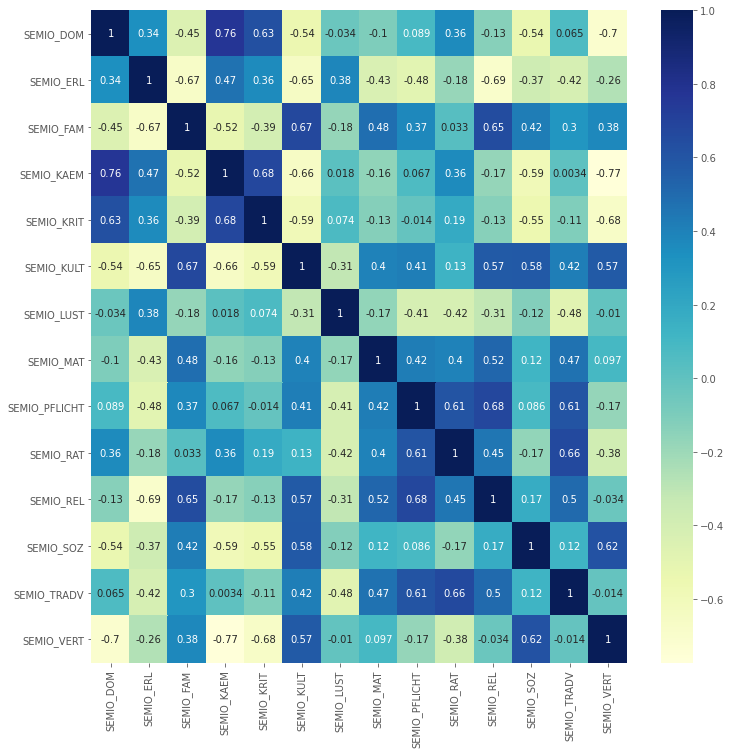

In [14]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(semio_corr, annot=True, cmap="YlGnBu")
plt.show()

In [15]:
lp_corr = clean_g_data.filter(regex='^LP_', axis=1).corr()

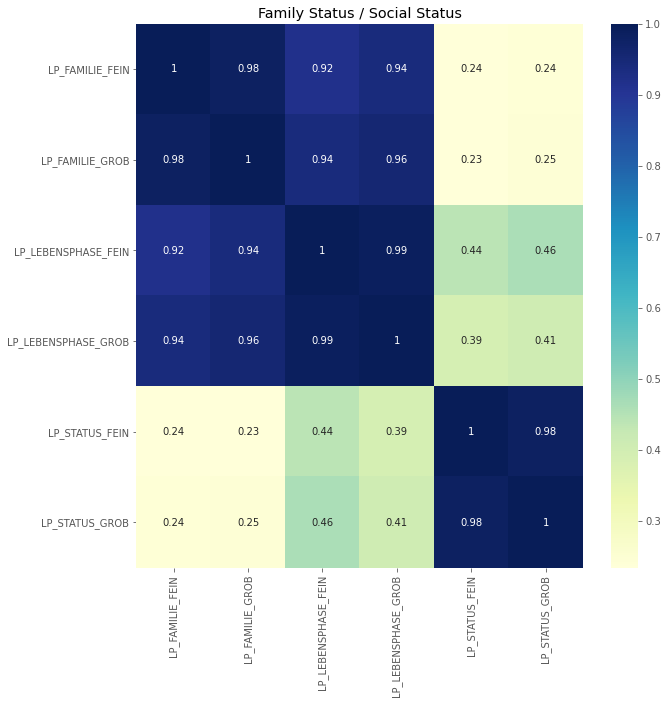

In [16]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(lp_corr, annot=True, cmap="YlGnBu")
plt.title('Family Status / Social Status')
plt.show()

In [17]:
kb5_corr = clean_g_data.filter(regex='^KBA05_', axis=1).corr()

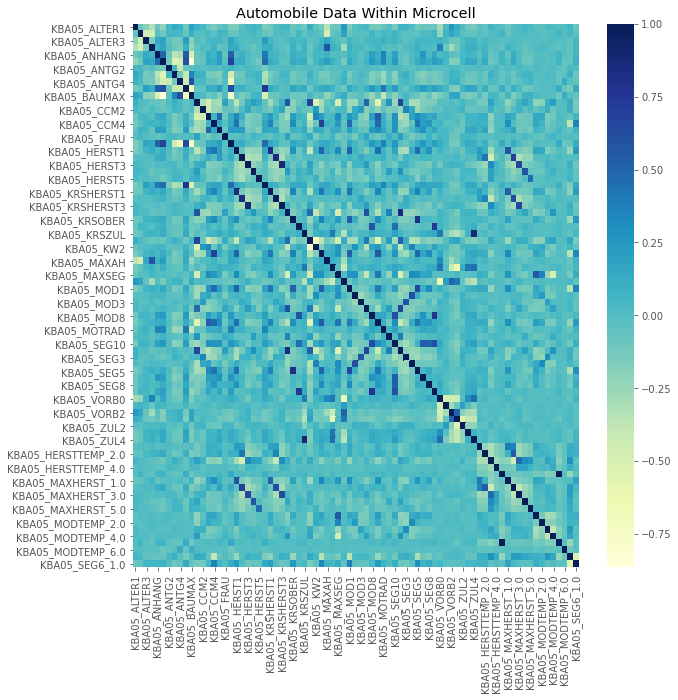

In [18]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(kb5_corr, annot=False, cmap="YlGnBu")
plt.title('Automobile Data Within Microcell')
plt.show()

In [19]:
string_df = clean_g_data.select_dtypes(exclude=[np.number])
string_df.columns

Index(['CAMEO_DEUG_2015'], dtype='object')

In [20]:
def clean_data_part_two(df, metadata, drop_threshold=20):
    
    # drop features with percentage of missing columns > drop_threshold
    percent_missing = df.isnull().sum() * 100 / len(df)
    mv_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
    mv_cols = mv_df.loc[mv_df['percent_missing'] > drop_threshold]['column_name']    
    df = df.drop(list(mv_cols), axis=1)
    
    # drop na
    df = df.dropna()
    
    # set all to float
    df = df.astype('float32')
    
    if False:
        # reverse some columns so they make more intuitive sense
        reverse_cols = list(metadata.loc[metadata['needs_reverse'] == 1, 'feature_name'])
        df_cols = list(df.columns)
        for col in reverse_cols:
            if col in df_cols:
                series = df[col]
                df[col] = series.apply(reverse_order, args=(np.max(series), np.min(series)))
    
    return df

In [21]:
print(clean_c_data.shape)
clean_c_data = clean_data_part_two(clean_c_data, metadata, drop_threshold=30)
print(clean_c_data.shape)

(191526, 375)
(120104, 370)


In [22]:
print(clean_g_data.shape)
clean_g_data = clean_data_part_two(clean_g_data, metadata)
print(clean_g_data.shape)

(890848, 377)
(616864, 371)


In [23]:
g_cols = set(clean_g_data.columns)
c_cols = set(clean_c_data.columns)
intersection = set.intersection(g_cols, c_cols)

clean_g_data = clean_g_data[list(intersection)]
clean_c_data = clean_c_data[list(intersection)]
assert(sorted(list(clean_g_data.columns)) == sorted(list(clean_c_data.columns)))

print(clean_g_data.shape)
print(clean_c_data.shape)

(616864, 367)
(120104, 367)


In [24]:
assert list(clean_g_data.columns) == list(clean_c_data.columns)